# 데이터 분석 프로젝트(머신 러닝 활용)
<hr>

# 팀 프로젝트 주제
## 수면 장애(Sleep Disorder)에 영향을 끼치는 요인 분석
1. 수면 장애를 일으키는 특성을 모은 데이터를 활용해 어떤 특성이 가장 많은 수면 장애에 영향을 끼치는지 분석하고자 함.
2. 주어진 데이터에서 전처리 후 표준화를 진행하였음.
3. 특성을 가장 잘 찾아내는 모델을 찾기 위해 3개의 모델을 사용하여 학습, 테스트를 진행함 

<br>

## 데이터 불러오기

In [53]:
import pandas as pd
import numpy as np

data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [54]:
# 데이터 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [55]:
data.shape

(374, 13)

## 데이터 전처리

* Person ID 열 인덱스 처리

In [56]:
data.set_index('Person ID', inplace=True)

In [57]:
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [58]:
# object형 데이터 확인
data['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

* Gender, BMI Category 수치화를 위해 원핫인코딩 방식으로 변환
* 변환된 데이터의 기존 데이터는 삭제

In [59]:
onehot_gender = pd.get_dummies(data['Gender'])
data = pd.concat([data, onehot_gender], axis = 1)

onehot_bmi = pd.get_dummies(data['BMI Category'])
data = pd.concat([data, onehot_bmi], axis = 1)

data.drop(['Gender', 'BMI Category'], axis=1, inplace=True)

* 선형 회귀 모델에서 사용하기 위해 target 데이터도 원핫인코딩 방식으로 변환

In [60]:
onehot_target = pd.get_dummies(data['Sleep Disorder'])
data = pd.concat([data, onehot_target], axis=1)

data.drop(['Sleep Disorder'], axis=1, inplace=True)

* Blood Pressure 슬래시 이하 데이터 삭제

In [61]:
for i in range(1, len(data['Blood Pressure'])+1) :
    data.loc[i, 'Blood Pressure'] = data['Blood Pressure'][i].split('/')[0]

In [62]:
data['Blood Pressure'] = data['Blood Pressure'].astype(float)

In [63]:
# 데이터 확인
data.head()

,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Female,Male,Normal,Normal Weight,Obese,Overweight,Insomnia,None,Sleep Apnea
Person ID,,,,,,,,,,,,,,,,,,
1,27,Software Engineer,6.1,6,42,6,126.0,77,4200,0,1,0,0,0,1,0,1,0
2,28,Doctor,6.2,6,60,8,125.0,75,10000,0,1,1,0,0,0,0,1,0
3,28,Doctor,6.2,6,60,8,125.0,75,10000,0,1,1,0,0,0,0,1,0
4,28,Sales Representative,5.9,4,30,8,140.0,85,3000,0,1,0,0,1,0,0,0,1
5,28,Sales Representative,5.9,4,30,8,140.0,85,3000,0,1,0,0,1,0,0,0,1


* train 데이터와 target 데이터로 구분

In [67]:
sleep_train = data[['Female', 'Male', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Normal', 'Normal Weight', 'Obese', 'Overweight', 'Blood Pressure', 'Heart Rate', 'Daily Steps']].to_numpy()
# sleep_train[:3]

In [65]:
sleep_target = data[['Insomnia', 'None', 'Sleep Apnea']].to_numpy()
sleep_target[:5]

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

<br>

## 데이터 상관관계 표현

<Axes: >

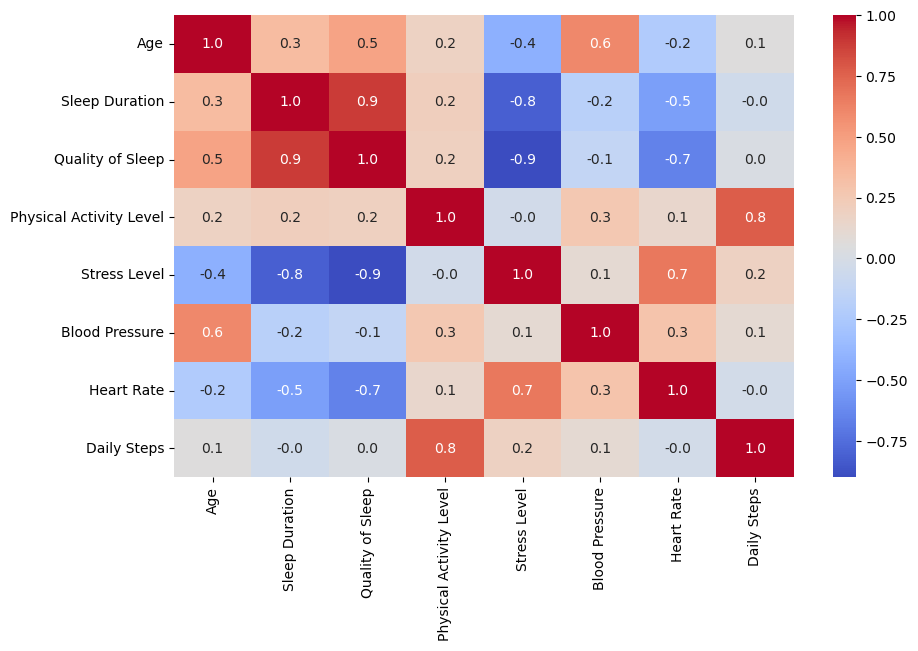

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

data_sample = data[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Blood Pressure', 'Heart Rate', 'Daily Steps']]
corr = data_sample.corr()
plt.figure(figsize=(10,6)) 
sns.heatmap(corr, annot=True, fmt='1.1f', cmap='coolwarm') # 상관관계 확인

* Sleep Duration과 Quality of Sleep은 높은 양의 상관관계를 갖고 있다
* Quality of Sleep과 Stress Level은 높은 음의 상관관계를 갖고 있다

##  훈련 데이터 나누기

In [27]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(sleep_train, sleep_target, random_state=42)

In [30]:
train_input[:3]
train_input.shape

(280, 14)

In [31]:
test_input[:3]
test_input.shape

(94, 14)

## 훈련 데이터 표준화

In [33]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [34]:
train_scaled[:3]

array([[-1.04381619,  1.04381619,  0.17265472, -1.08260812, -1.15283871,
        -0.73085692,  0.96057491, -1.02899151, -0.24618298, -0.14797909,
         1.20670641,  0.1869272 ,  0.47516158, -0.55224501],
       [-1.04381619,  1.04381619,  0.17265472, -1.08260812, -1.15283871,
        -0.73085692,  0.96057491, -1.02899151, -0.24618298, -0.14797909,
         1.20670641,  0.1869272 ,  0.47516158, -0.55224501],
       [-1.04381619,  1.04381619, -0.53653825, -0.06325453,  0.55056413,
        -0.00995531, -0.1766808 ,  0.97182532, -0.24618298, -0.14797909,
        -0.82870199,  0.1869272 , -0.50853707,  0.69980845]])

In [35]:
test_scaled[:3]

array([[ 0.95802308, -0.95802308,  1.23644416,  1.72061425,  1.40226556,
        -1.45175853, -1.31393651,  0.97182532, -0.24618298, -0.14797909,
        -0.82870199, -0.4513608 , -1.24631107, -1.17827174],
       [-1.04381619,  1.04381619, -1.36393004, -1.33744652, -1.15283871,
        -1.45175853,  1.52920276,  0.97182532, -0.24618298, -0.14797909,
        -0.82870199, -0.4513608 ,  0.47516158, -1.17827174],
       [-1.04381619,  1.04381619, -1.6003277 , -1.46486572, -1.15283871,
        -1.45175853,  1.52920276,  0.97182532, -0.24618298, -0.14797909,
        -0.82870199, -1.08964879, -0.01668775,  0.69980845]])

<br>

## 1. 선형 회귀 모델

In [39]:
from sklearn.linear_model import LinearRegression

# 표준화한 데이터 학습
lr = LinearRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.5915987412437881
0.5856466165662247


In [38]:
# 표준화 하지 않은 데이터 학습
lr2 = LinearRegression()
lr2.fit(train_input, train_target)

print(lr2.score(train_input, train_target))
print(lr2.score(test_input, test_target))

0.593022669236782
0.587941973936325


### 선형 회귀 모델
* 수면 장애를 일으키는 요인이 종합되어 수면 장애 판단에 영향을 미칠 것이라고 예상했음
* 데이터에서 제공하는 수면 장애유 형은 총 3가지로 예측모델(회귀모델)을 사용하여 각 특성의 수치를 집어 넣으면 예측이 될 것이라고 생각함
* 그러나 실제로 학습 후 테스트 점수 확인 결과, 예상과는 다르게 점수가 많이 낮게 나옴 
* 표준화 한 lr모델과 표준화 하지 않은 lr2의 모델의 스코어가 거의 같음을 확인 할 수 있음

---

* 이 결과로 회귀모델에서는 분석이 제대로 되지 않는다는 것을 알 수 있었음
* 따라서 회귀모델이 아닌 분류모델에서 모델 학습과 테스트를 진행하기로 결정함
* 해당 과정에서 수면 장애 예측이 아닌 수면 장애 유형을 찾아내는 특성의 중요도를 분석하여 어떤 특성이 수면 장애에 가장 영향을 미치는지 분석하고자 함

<br>